<a href="https://colab.research.google.com/github/Nkoyoasuz/A-Comprehensive-Dataset-for-Predicting-Diabetes-with-Medical-Demographic-Data/blob/main/Nkoyoasuz_Diabetes_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#Data Cleaning

 Check for Missing Values

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Detect Zeros in Unusual Columns

#Check class distribution (balanced or imbalanced):

In [ ]:
print(df['diabetes'].value_counts())

diabetes
0    91500
1     8500
Name: count, dtype: int64


# Data Preprocessing
Task: Clean and prepare the data for modeling.
Actions:
Handle Missing Values:
Numeric features (e.g., BMI, HbA1c): Impute with mean or median.
Categorical features (e.g., gender, smoking history): Impute with mode or a placeholder.

In [ ]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df['smoking_history'].fillna('Unknown', inplace=True)

#Encode Categorical Variables:
Convert categorical features (gender, smoking history) to numeric using one-hot encoding.

In [ ]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

#Feature Scaling:
Standardize numeric features (age, BMI, HbA1c, blood glucose) to have mean=0 and variance=1, as many algorithms (e.g., SVM, KNN) are sensitive to scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#Split Features and Target:

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

#Exploratory Data Analysis (EDA)
Explore relationships between features and diabetes status.

Visualize Feature Distributions:
Plot histograms for numeric features.

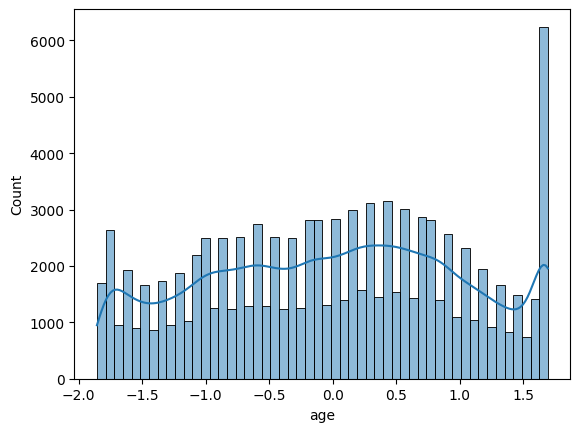

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde=True)
plt.show()

#Correlation Analysis:
Check correlations between numeric features and the target.

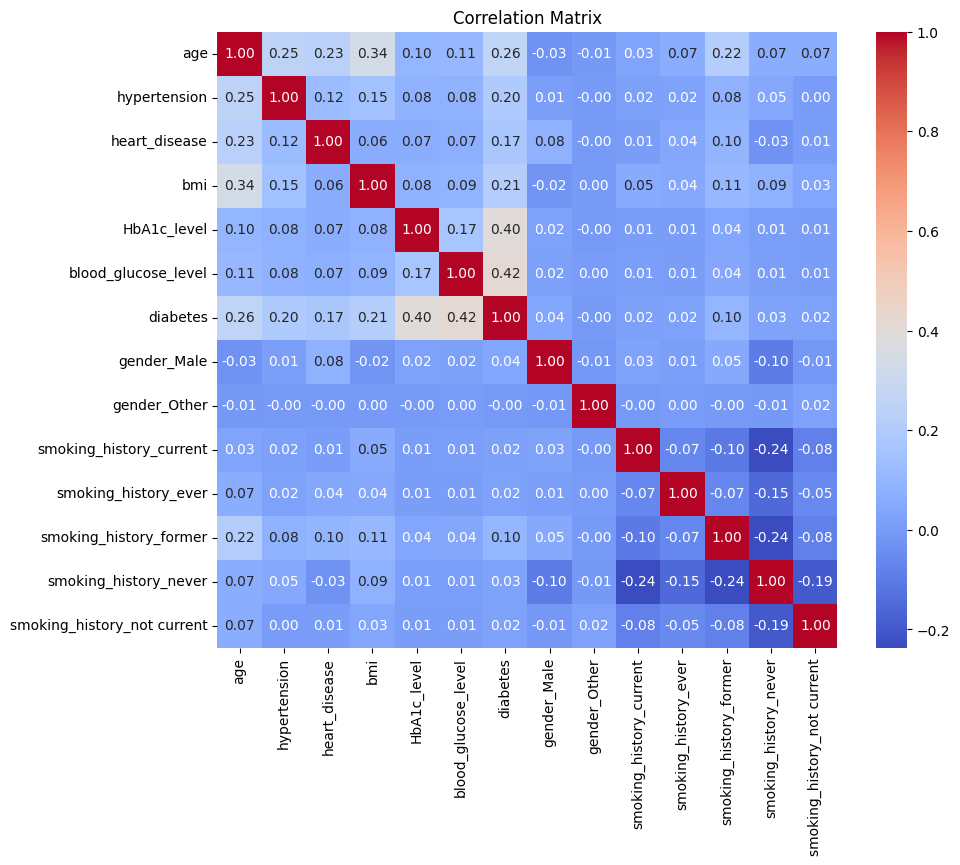

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

#Feature vs. Target Relationships:
Boxplots for numeric features by diabetes status

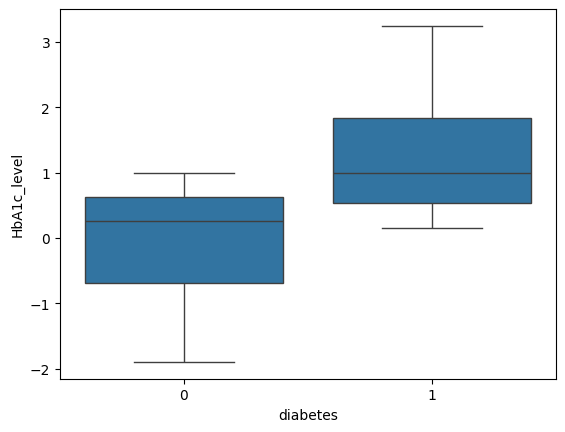

In [ ]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.show()

#Count plots for categorical features.

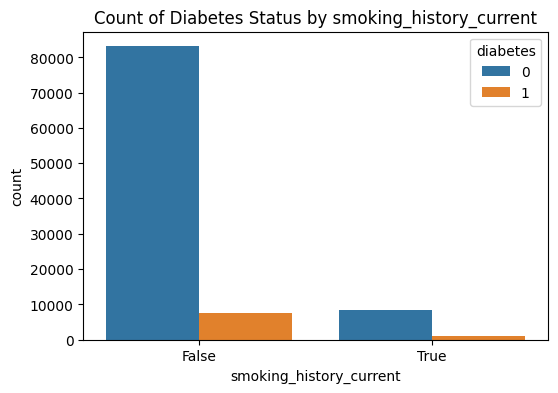

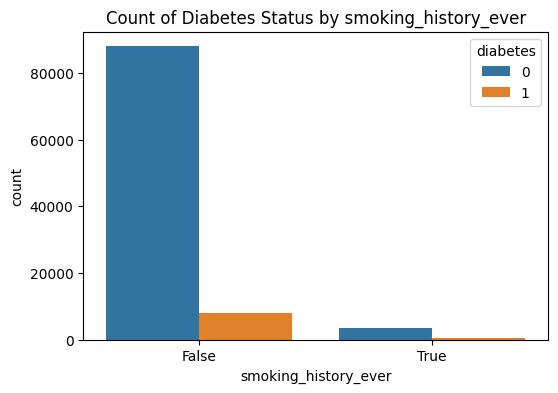

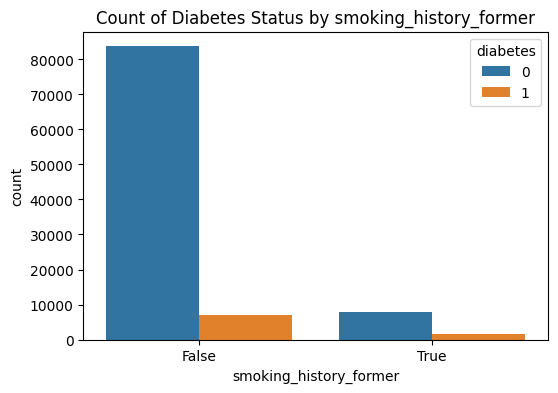

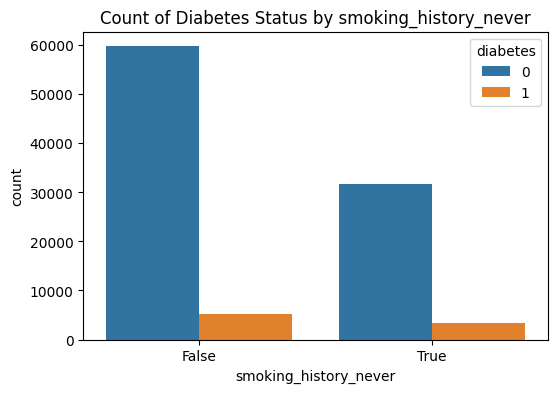

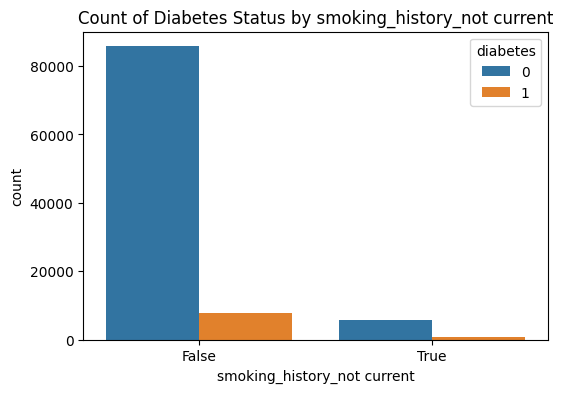

In [ ]:
# Plot count plots for the one-hot encoded smoking history columns
smoking_history_cols = [col for col in df.columns if 'smoking_history_' in col]

for col in smoking_history_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='diabetes', data=df)
    plt.title(f'Count of Diabetes Status by {col}')
    plt.show()

Identify key predictors (e.g., high HbA1c may strongly correlate with diabetes) and understand data patterns.

#Split the Data
Task: Divide the dataset into training and testing sets.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Using 80% of data for training and 20% for testing. Stratify to maintain class distribution in both sets, especially if imbalanced.

#Train a Machine Learning Model
Build and train a predictive model. Let with a simple model like Logistic Regression, then the complex models (Random Forest, Gradient Boosting).

1.  Train a Logistic Regression model:


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

2. Make predictions:

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000

ROC-AUC: 0.9624995339119256


#Model Improvement

Enhance model performance if needed.
1. Handle Imbalanced Data (if applicable):
Using techniques like SMOTE (Synthetic Minority Oversampling Technique).

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

2. Trying Other Algorithms:

    Random Forest or XGBoost for potentially better performance.

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.95      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



3. Hyperparameter Tuning:
   Using GridSearchCV to find optimal parameters.

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 200}


#Interpret the Model
For Random Forest, check feature importance.

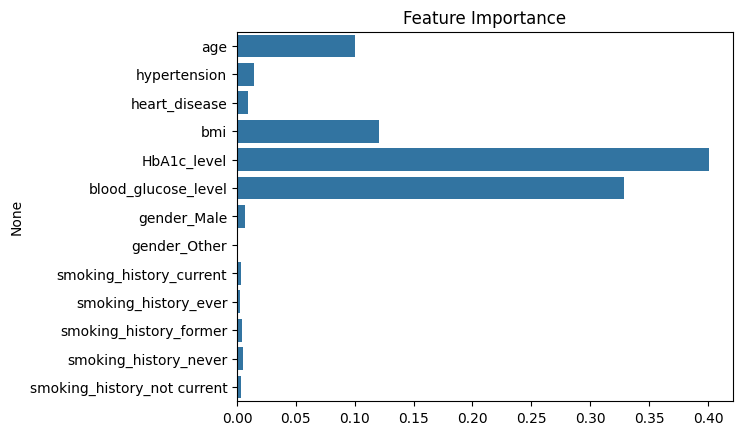

In [40]:
importances = rf_model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

Identifying key predictors (e.g., HbA1c, blood glucose) for clinical insights and personalized treatment plans.

#Deploy and Use the Model
Apply the model for predictions or research and
Save the model for future use.

In [41]:
import joblib
joblib.dump(rf_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

Explore Relationships for Research

In [46]:
from scipy.stats import ttest_ind
diabetic = df[df['diabetes'] == 1]['HbA1c_level']
non_diabetic = df[df['diabetes'] == 0]['HbA1c_level']
t_stat, p_val = ttest_ind(diabetic, non_diabetic)
print("HbA1c t-test p-value:", p_val)

HbA1c t-test p-value: 0.0


Visualizing trends (e.g., diabetes prevalence by age group or BMI range).


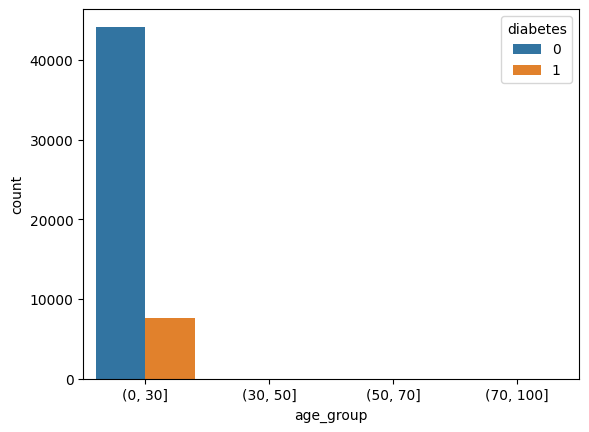

In [47]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100])
sns.countplot(x='age_group', hue='diabetes', data=df)
plt.show()

Providing insights for researchers studying diabetes risk factors.